<a href="https://colab.research.google.com/github/muhsintsn/project/blob/main/used_car_price_prediction_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 175)

# Data Gathering

In [ ]:
df = pd.read_csv("car_dataset.csv")

# Data Preparation

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,...,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Car_Name,ritz,sx4,ciaz,wagon r,swift,vitara brezza,ciaz,s cross,ciaz,ciaz,alto 800,ciaz,ciaz,ertiga,dzire,ertiga,ertiga,ertiga,wagon r,sx4,alto k10,ignis,sx4,alto k10,wagon r,swift,swift,swift,alto k10,ciaz,ritz,ritz,swift,ertiga,dzire,sx4,dzire,800,alto k10,sx4,baleno,alto k10,sx4,dzire,omni,ciaz,ritz,wagon r,ertiga,ciaz,fortuner,fortuner,innova,fortuner,innova,corolla altis,etios cross,corolla altis,etios g,fortuner,corolla altis,etios cross,fortuner,fortuner,fortuner,etios liva,innova,fortuner,corolla altis,corolla altis,etios liva,corolla altis,corolla altis,etios liva,etios cross,etios g,corolla altis,corolla,corolla altis,fortuner,corolla altis,etios gd,innova,innova,innova,camry,land cruiser,...,grand i10,verna,eon,eon,verna,verna,eon,i20,i20,verna,verna,i10,grand i10,i10,verna,i20,verna,verna,elantra,grand i10,grand i10,verna,eon,creta,verna,eon,verna,xcent,xcent,i20,verna,verna,i20,verna,i10,i20,creta,city,brio,city,city,brio,city,city,city,amaze,city,brio,amaze,jazz,amaze,jazz,amaze,city,brio,city,city,city,city,jazz,brio,city,city,city,jazz,city,brio,city,city,city,brio,jazz,jazz,amaze,city,city,amaze,brio,jazz,city,amaze,city,city,brio,city,city,brio
Year,2014,2013,2017,2011,2014,2018,2015,2015,2016,2015,2017,2015,2015,2015,2009,2016,2015,2016,2015,2010,2016,2017,2011,2014,2013,2011,2013,2017,2010,2015,2012,2011,2014,2014,2014,2011,2015,2003,2016,2003,2016,2014,2008,2014,2012,2014,2013,2006,2015,2017,2012,2015,2017,2013,2005,2009,2015,2010,2014,2014,2013,2015,2014,2015,2017,2014,2017,2010,2011,2016,2014,2011,2013,2011,2014,2015,2013,2004,2010,2012,2016,2015,2017,2015,2005,2006,2010,...,2017,2012,2016,2016,2014,2012,2017,2013,2014,2015,2013,2011,2015,2011,2012,2012,2013,2017,2015,2013,2015,2017,2016,2015,2013,2012,2012,2015,2014,2016,2013,2012,2012,2015,2013,2016,2016,2013,2015,2014,2013,2012,2016,2015,2015,2014,2016,2016,2015,2016,2015,2017,2014,2016,2017,2015,2011,2009,2015,2010,2014,2016,2015,2015,2016,2014,2015,2006,2014,2016,2013,2016,2016,2015,2015,2016,2014,2015,2016,2010,2014,2015,2016,2015,2009,2017,2016
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,2.85,6.85,7.5,6.1,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.9,4.4,2.5,2.9,3.0,4.15,6.0,1.95,7.45,3.1,2.35,4.95,6.0,5.5,2.95,4.65,0.35,3.0,2.25,5.85,2.55,1.95,5.5,1.25,7.5,2.65,1.05,5.8,7.75,14.9,23.0,18.0,16.0,2.75,3.6,4.5,4.75,4.1,19.99,6.95,4.5,18.75,23.5,33.0,4.75,19.75,9.25,4.35,14.25,3.95,4.5,7.45,2.65,4.9,3.95,5.5,1.5,5.25,14.5,14.73,4.75,23.0,12.5,3.49,2.5,35.0,...,5.25,4.5,2.9,3.15,6.45,4.5,3.5,4.5,6.0,8.25,5.11,2.7,5.25,2.55,4.95,3.1,6.15,9.25,11.45,3.9,5.5,9.1,3.1,11.25,4.8,2.0,5.35,4.75,4.4,6.25,5.95,5.2,3.75,5.95,4.0,5.25,12.9,5.0,5.4,7.2,5.25,3.0,10.25,8.5,8.4,3.9,9.15,5.5,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.2,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,30.61,30.61,19.77,30.61,10.21,15.04,7.27,18.54,6.8,35.96,18.61,7.7,35.96,35.96,36.23,6.95,23.15,20.45,13.74,20.91,6.76,12.48,18.61,5.71,8.93,6.8,14.68,12.35,22.83,30.61,14.89,7.85,25.39,13.46,13.46,23.73,92.6,...,5.7,9.4,4.43,4.43,9.4,9.4,4.43,

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [ ]:
df = df.join(df["Fuel_Type"].str.get_dummies(sep = ",").add_prefix(" Fuel_type_"))

In [ ]:
df = df.join(df["Transmission"].str.get_dummies(sep = ",").add_prefix(" Transmission_"))

In [ ]:
df = df.join(df["Seller_Type"].str.get_dummies(sep = ",").add_prefix(" Seller_Type_"))

In [ ]:
df.drop(["Fuel_Type","Transmission","Seller_Type"], axis=1, inplace=True)

In [ ]:
df.drop(["Selling_Price"], axis=1, inplace=True)

In [ ]:
df["Car_Name"].value_counts() 

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Yamaha FZ S             1
Hero Super Splendor     1
Hero  Ignitor Disc      1
Hero  CBZ Xtreme        1
land cruiser            1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
df = df.join(df["Car_Name"].str.get_dummies(sep = ",").add_prefix(" Car_Name_"))

In [ ]:
df.drop(["Car_Name"], axis=1, inplace=True)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,...,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Year,2014.00,2013.00,2017.00,2011.00,2014.00,2018.00,2015.00,2015.00,2016.00,2015.00,2017.0,2015.00,2015.00,2015.00,2009.00,2016.00,2015.00,2016.00,2015.00,2010.00,2016.00,2017.00,2011.00,2014.00,2013.00,2011.00,2013.00,2017.00,2010.00,2015.00,2012.00,2011.00,2014.00,2014.00,2014.00,2011.00,2015.0,2003.00,2016.00,2003.00,2016.00,2014.00,2008.00,2014.00,2012.00,2014.00,2013.00,2006.00,2015.00,2017.00,2012.00,2015.00,2017.00,2013.00,2005.00,2009.00,2015.00,2010.00,2014.0,2014.00,2013.00,2015.0,2014.00,2015.00,2017.00,2014.00,2017.00,2010.00,2011.00,2016.00,2014.00,2011.00,2013.00,2011.00,2014.00,2015.0,2013.00,2004.00,2010.00,2012.00,2016.00,2015.00,2017.00,2015.00,2005.00,2006.00,2010.0,...,2017.0,2012.0,2016.00,2016.00,2014.0,2012.0,2017.00,2013.00,2014.0,2015.0,2013.0,2011.0,2015.0,2011.00,2012.0,2012.00,2013.0,2017.0,2015.00,2013.0,2015.0,2017.0,2016.00,2015.0,2013.0,2012.00,2012.0,2015.00,2014.00,2016.0,2013.0,2012.0,2012.00,2015.0,2013.0,2016.0,2016.0,2013.0,2015.00,2014.0,2013.0,2012.00,2016.0,2015.0,2015.0,2014.0,2016.0,2016.00,2015.0,2016.0,2015.0,2017.0,2014.0,2016.0,2017.0,2015.0,2011.0,2009.0,2015.0,2010.0,2014.0,2016.0,2015.0,2015.0,2016.0,2014.0,2015.0,2006.0,2014.0,2016.0,2013.0,2016.0,2016.0,2015.0,2015.0,2016.0,2014.0,2015.0,2016.0,2010.0,2014.0,2015.00,2016.0,2015.0,2009.0,2017.0,2016.0
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.2,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,30.61,30.61,19.77,30.61,10.21,15.04,7.27,18.54,6.8,35.96,18.61,7.7,35.96,35.96,36.23,6.95,23.15,20.45,13.74,20.91,6.76,12.48,18.61,5.71,8.93,6.8,14.68,12.35,22.83,30.61,14.89,7.85,25.39,13.46,13.46,23.73,92.6,...,5.7,9.4,4.43,4.43,9.4,9.4,4.43,6.79,7.6,9.4,9.4,4.6,5.7,4.43,9.4,6.79,9.4,9.4,14.79,5.7,5.7,9.4,4.43,13.6,9.4,4.43,9.4,7.13,7.13,7.6,9.4,9.4,6.79,9.4,4.6,7.6,13.6,9.9,6.82,9.9,9.9,5.35,13.6,13.6,13.6,7.0,13.6,5.97,5.8,7.7,7.0,8.7,7.0,9.4,5.8,10.0,10.0,10.0,10.0,7.5,6.8,13.6,13.6,13.6,8.4,13.6,5.9,7.6,14.0,11.8,5.9,8.5,7.9,7.5,13.6,13.6,6.4,6.1,8.4,9.9,6.8,13.09,11.6,5.9,11.0,12.5,5.9
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00,2071.00,18796.00,33429.00,20273.00,42367.00,2135.0,51000.00,15000.00,26000.00,77427.00,43000.00,41678.00,43000.00,35500.00,41442.00,25000.00,2400.00,50000.00,45280.00,56879.00,20000.00,55138.00,16200.00,44542.00,45000.00,51439.00,54200.00,39000.00,45000.00,45000.00,49998.00,48767.0,127000.00,10079.00,62000.00,24524.00,46706.00,58000.00,45780.00,50000.00,15000.00,64532.00,65000.00,25870.00,37000.00,104707.00,40000.00,15000.00,135000.00,90000.00,70000.00,40534.00,50000.00,39485.0,41000.00,40001.00,40588.0,78000.00,47000.00,6000.00,45000.00,11000.00,59000.00,88000.00,12000.00,71000.00,45000.00,56001.00,43000.00,83000.00,36000.0,72000.00,135154.00,80000.00,89000.00,23000.00,40000.00,15000.00,38000.00,197176.00,142000.00,78000.0,...,20114.0,36100.0,12500.00,15000.00,45078.0,36000.0,38488.00,32000.00,77632.0,61381.0,36198.0,22517.0,24678.0,57000.00,60000.0,52132.00,45000.0,15001.0,12900.00,53000.0,4492.0,15141.0,11849.00,68000.0,60241.0,23709.00,32322.0,35866.00,34000.00,7000.0,49000.0,71000.0,35000.00,36000.0,30000.0,17000.0,35934.0,56701.0,31427.00,48000.0,54242.0,53675.00,49562.0,40324.0,25000.0,36054.0,29223.0,5600.00,40023.0,16002.0,

### Features and target variable

In [ ]:
X= df.drop("Present_Price", axis=1)
y= df["Present_Price"]

### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42) 

##  Model Building (Linear Regression)

In [ ]:
Linear_Regression = LinearRegression()


In [ ]:
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = Linear_Regression.predict(X_test)
y_train_pred = Linear_Regression.predict(X_train)

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
LR_score = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
LR_score

,linear_train,linear_test
R2,1.000000e+00,1.000000e+00
mae,2.609265e-11,2.900255e-11
mse,1.888439e-21,1.553889e-21
rmse,4.345617e-11,3.941940e-11


In [ ]:
LR_score.T

,R2,mae,mse,rmse
linear_train,1.0,2.609265e-11,1.888439e-21,4.345617e-11
linear_test,1.0,2.900255e-11,1.553889e-21,3.941940e-11


# Interpret the model

# Model Evaluation

# Regularization

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
LR_model = LinearRegression()

In [ ]:
cv_score = cross_validate(LR_model,X_train, y_train, scoring=('r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'), cv = 5)

In [ ]:
pd.DataFrame(cv_score, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.012991,0.010996,1.0,-2.185137e-11,-2.077277e-21,-4.557716e-11
2,0.014990,0.009991,1.0,-1.886057e-11,-5.695080e-22,-2.386437e-11
3,0.012994,0.006993,1.0,-2.051229e-11,-7.574804e-22,-2.752236e-11
4,0.009991,0.005997,1.0,-1.007390e-05,-8.542167e-10,-2.922699e-05
5,0.007994,0.005997,1.0,-3.003755e-11,-1.641022e-21,-4.050953e-11


In [ ]:
cv_score = pd.DataFrame(cv_score, index=range(1,6))
cv_score.iloc[:, 2:].mean()

test_r2                             1.000000e+00
test_neg_mean_absolute_error       -2.014797e-06
test_neg_mean_squared_error        -1.708433e-10
test_neg_root_mean_squared_error   -5.845425e-06
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,1.000000e+00,1.000000e+00
mae,2.609265e-11,2.900255e-11
mse,1.888439e-21,1.553889e-21
rmse,4.345617e-11,3.941940e-11


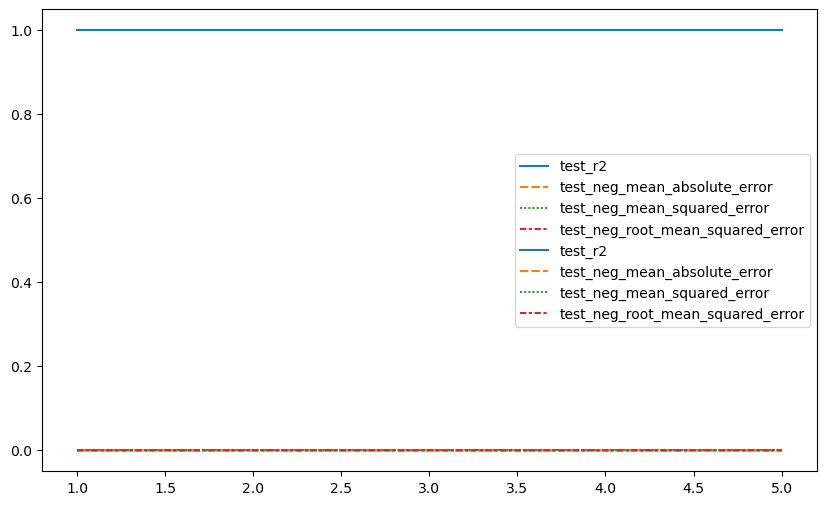

In [ ]:
sns.lineplot(data = cv_score.iloc[:,2:]);
plt.show()

## Linear_Regression.coef_

In [ ]:
Linear_Regression.coef_

array([-1.56587206e-12,  1.00000000e+00, -1.11022302e-16,  7.77156117e-16,
       -2.45775622e-14, -2.83280344e-14, -2.50494070e-14, -1.25801279e-13,
       -1.28293751e-13, -5.22932392e-15, -5.44096018e-15,  1.23078631e-15,
        1.18759169e-14,  1.79370407e-15, -3.94649591e-17,  7.55255233e-16,
        8.70831185e-16,  3.04931861e-16,  4.51407575e-16,  1.77940616e-15,
        1.87480240e-15,  3.39935328e-15,  1.34332649e-16, -9.99634403e-17,
        7.98948581e-16, -2.88614618e-16,  1.03023601e-15, -1.56848276e-14,
        5.09954492e-16,  6.07153217e-17,  4.43579635e-15,  1.54233180e-15,
        9.48026380e-16,  6.80878964e-17,  1.64080446e-15,  3.52777703e-15,
        5.50408785e-16,  1.38780589e-15,  3.25260652e-19,  1.67574288e-15,
        1.21116225e-15,  2.16840434e-19,  5.81023944e-15,  2.32886627e-16,
        9.68572011e-16, -7.58941521e-19,  1.62550366e-15,  3.55509892e-16,
        4.15113907e-16,  1.78264815e-26,  5.95432991e-15,  2.13219199e-15,
        7.19503667e-16,  

In [ ]:
Linear_Regression_coef_df = pd.DataFrame(Linear_Regression.coef_, columns= ["Linear_Regression.coef"])

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [ ]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

,ridge_train,ridge_test
R2,1.000000e+00,1.000000e+00
mae,3.271649e-04,3.557749e-04
mse,5.527306e-07,2.557390e-07
rmse,7.434585e-04,5.057065e-04


In [ ]:
pd.concat([LR_score, ridge_score], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
mae,2.609265e-11,2.900255e-11,3.271649e-04,3.557749e-04
mse,1.888439e-21,1.553889e-21,5.527306e-07,2.557390e-07
rmse,4.345617e-11,3.941940e-11,7.434585e-04,5.057065e-04


In [ ]:
model = Ridge(alpha=1, random_state=42)
cv_alpha_scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(cv_alpha_scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007995,0.009995,0.999999,-0.004346,-1.991277e-04,-0.014111
2,0.007994,0.005998,1.000000,-0.000432,-6.742183e-07,-0.000821
3,0.006993,0.008996,1.000000,-0.000367,-3.025333e-07,-0.000550
4,0.009999,0.005990,1.000000,-0.000532,-6.570702e-07,-0.000811
5,0.005996,0.005995,1.000000,-0.000387,-2.971171e-07,-0.000545


In [ ]:
cv_alpha_scores= pd.DataFrame(cv_alpha_scores, index = range(1, 6))
cv_alpha_scores.iloc[:,2:].mean()

test_r2                             1.000000
test_neg_mean_absolute_error       -0.001213
test_neg_mean_squared_error        -0.000040
test_neg_root_mean_squared_error   -0.003368
dtype: float64

## ridge_model.coef_

In [ ]:
ridge_model.coef_

array([ 5.78693053e-06,  9.99782435e-01,  1.87192410e-09,  4.92383419e-04,
       -1.88073731e-04,  4.55504801e-04, -2.67431070e-04,  4.32951385e-04,
       -4.32951385e-04,  7.52140941e-04, -7.52140941e-04,  3.68564415e-05,
       -9.51132974e-04,  0.00000000e+00,  0.00000000e+00, -4.94409743e-05,
       -6.16084810e-05, -3.84813233e-05, -3.92153988e-05, -3.45676569e-05,
       -8.97622083e-05, -3.25926070e-04,  4.01199854e-05,  0.00000000e+00,
       -6.73301585e-05, -1.19130585e-04, -6.83600160e-05, -5.13454680e-05,
        1.81563725e-06,  0.00000000e+00, -3.19180989e-04, -5.25559102e-05,
       -7.60760915e-05,  0.00000000e+00, -1.19019971e-04, -3.14341018e-04,
       -9.63220504e-05, -9.90996401e-05,  0.00000000e+00, -8.13826430e-05,
       -8.75589652e-05,  0.00000000e+00, -6.85553603e-04, -6.93766328e-05,
       -9.03861486e-05,  0.00000000e+00, -8.48264943e-05, -1.22445709e-04,
       -1.55844951e-05,  0.00000000e+00, -1.51331991e-04, -1.04642810e-05,
        1.30397646e-04,  

In [ ]:
ridge_model_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_alpha1"])

In [ ]:
pd.concat([Linear_Regression_coef_df, ridge_model_df], axis=1)

,Linear_Regression.coef,ridge_coef_alpha1
0,-1.565872e-12,5.786931e-06
1,1.000000e+00,9.997824e-01
2,-1.110223e-16,1.871924e-09
3,7.771561e-16,4.923834e-04
4,-2.457756e-14,-1.880737e-04
...,...,...
104,-5.517288e-15,-1.918916e-04
105,-7.379080e-16,5.124791e-05
106,0.000000e+00,0.000000e+00
107,6.351256e-15,-6.409437e-04


In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_cv_alphaspace_model = RidgeCV(alphas= alpha_space, cv = 5, scoring= "neg_root_mean_squared_error") 

In [ ]:
ridge_cv_alphaspace_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_alphaspace_model.alpha_

0.01

In [ ]:
ridge_cv_alphaspace_model.best_score_

-0.00017593487845595103

# Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

In [ ]:
lasos_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lasos_score

,lasso_train,lasso_test
R2,0.999833,0.999837
mae,0.066319,0.071999
mse,0.013119,0.010458
rmse,0.114540,0.102265


In [ ]:
pd.concat([LR_score, ridge_score, lasos_score], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.999833,0.999837
mae,2.609265e-11,2.900255e-11,3.271649e-04,3.557749e-04,0.066319,0.071999
mse,1.888439e-21,1.553889e-21,5.527306e-07,2.557390e-07,0.013119,0.010458
rmse,4.345617e-11,3.941940e-11,7.434585e-04,5.057065e-04,0.114540,0.102265


## Elastic-Net 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
y_pred = elastic_model.predict(X_test)
y_train_pred = elastic_model.predict(X_train)

In [ ]:
elasti_cnet_score = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elasti_cnet_score 

,elastic_train,elastic_test
R2,0.999836,0.999839
mae,0.065879,0.071520
mse,0.012946,0.010320
rmse,0.113782,0.101586


In [ ]:
pd.concat([LR_score, ridge_score, lasos_score, elasti_cnet_score ], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.999833,0.999837,0.999836,0.999839
mae,2.609265e-11,2.900255e-11,3.271649e-04,3.557749e-04,0.066319,0.071999,0.065879,0.071520
mse,1.888439e-21,1.553889e-21,5.527306e-07,2.557390e-07,0.013119,0.010458,0.012946,0.010320
rmse,4.345617e-11,3.941940e-11,7.434585e-04,5.057065e-04,0.114540,0.102265,0.113782,0.101586
